## 1. Import the required libraries and read the dataset.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.shape

(5000, 14)

In [8]:
data['ZIP Code'].nunique()

467

## 3. Check if there are any duplicate records present in the dataset? If yes, drop them. and Drop the columns which you feel are redundant

In [9]:
data.duplicated().sum()

0

In [10]:
data=data.drop(['ID'],axis=1)
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [11]:
data.duplicated().sum()

0

In [12]:
data[['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']].nunique()

Family                4
Education             3
Personal Loan         2
Securities Account    2
CD Account            2
Online                2
CreditCard            2
dtype: int64

## 4. Display the Five Point Summary and write your key findings.

In [13]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
data.describe().T.iloc[:,3:]

,min,25%,50%,75%,max
Age,23.0,35.0,45.0,55.0,67.0
Experience,-3.0,10.0,20.0,30.0,43.0
Income,8.0,39.0,64.0,98.0,224.0
ZIP Code,9307.0,91911.0,93437.0,94608.0,96651.0
Family,1.0,1.0,2.0,3.0,4.0
CCAvg,0.0,0.7,1.5,2.5,10.0
Education,1.0,1.0,2.0,3.0,3.0
Mortgage,0.0,0.0,0.0,101.0,635.0
Personal Loan,0.0,0.0,0.0,0.0,1.0
Securities Account,0.0,0.0,0.0,0.0,1.0


In [15]:
data.describe().loc[['min','25%','50%','75%','max']]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
min,23.0,-3.0,8.0,9307.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,35.0,10.0,39.0,91911.0,1.0,0.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,45.0,20.0,64.0,93437.0,2.0,1.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,55.0,30.0,98.0,94608.0,3.0,2.5,3.0,101.0,0.0,0.0,0.0,1.0,1.0
max,67.0,43.0,224.0,96651.0,4.0,10.0,3.0,635.0,1.0,1.0,1.0,1.0,1.0


In [16]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## 5. There are negative values in the variable 'Experience'. Convert them to non-negative values. (Hint: .abs function)


In [17]:
data['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [18]:
data['Experience']=abs(data['Experience'])

In [19]:
data['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

## 6. Get the target column distribution and comment on the class distribution.


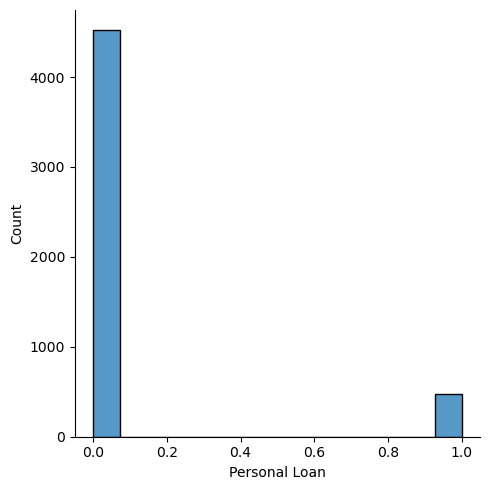

In [20]:
sns.displot(data['Personal Loan'])

<Axes: xlabel='Personal Loan', ylabel='Count'>

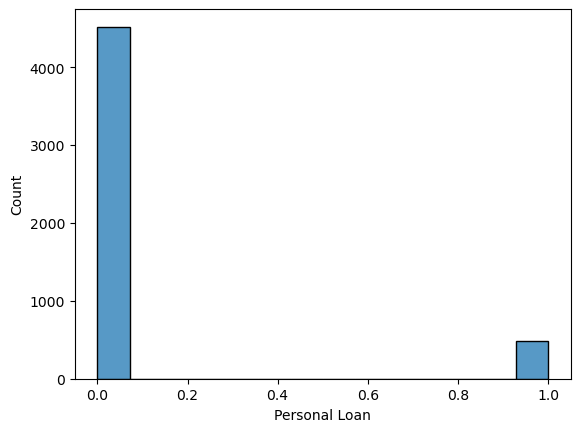

In [21]:
sns.histplot(data['Personal Loan'])

In [22]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

* 0 has more than 4000 and 1 has below 1000
* There is an more distribution for 0 and 1
* It is an imbalanced distribution

##  7. Store the target column (i.e.Personal Loan) in the y variable and the rest of the columns in the X variable.

In [23]:
x=data.drop(["Personal Loan"],axis=1)
y=data['Personal Loan']

## 8. Split the dataset into two parts (i.e. 70% train and 30% test). and standardize the columns using the z-score scaling approach.

In [24]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=1)

In [25]:
x_train

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13,21,95518,3,0.2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,60,36,39,94501,4,1.3,2,140,0,0,1,0
2763,55,31,13,93943,4,0.7,1,0,0,0,1,0
905,46,22,28,94720,1,1.0,1,84,0,0,1,1
3980,46,22,89,92866,4,1.4,2,0,0,0,1,0


In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train.iloc[:,[0,1,2,4,5]]=ss.fit_transform(x_train.iloc[:,[0,1,2,4,5]])

In [28]:
x_train

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,0.135977,0.153967,-0.837058,94304,-0.344955,-0.365708,1,0,0,0,1,0
4768,-0.646212,-0.544409,-0.750406,93118,-1.217944,0.037876,2,0,0,0,1,0
65,1.178895,1.288828,1.242590,91360,-1.217944,1.075664,1,0,0,0,1,1
177,-1.428400,-1.504676,-0.187168,94132,1.401022,-0.077434,2,244,0,0,0,0
4489,-0.559302,-0.631706,-1.140340,95518,0.528033,-0.999912,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.265805,1.376125,-0.750406,94501,1.401022,-0.365708,2,140,0,0,1,0
2763,0.831255,0.939640,-1.313644,93943,1.401022,-0.711638,1,0,0,0,1,0
905,0.049067,0.153967,-0.988699,94720,-1.217944,-0.538673,1,84,0,0,1,1
3980,0.049067,0.153967,0.332744,92866,1.401022,-0.308053,2,0,0,0,1,0


In [41]:
x_test.iloc[:,[0,1,2,4,5]]=ss.fit_transform(x_test.iloc[:,[0,1,2,4,5]])

In [42]:
x_test

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2764,-1.242790,-1.316716,0.216827,91320,-1.214350,0.536483,3,105,0,0,0,1
4767,-0.890526,-0.963172,-0.636250,90639,0.521262,-0.588707,1,101,1,0,0,0
3814,-0.978592,-0.963172,-0.854987,94304,0.521262,-0.363669,1,0,0,0,0,0
3499,0.342401,0.274232,0.873040,94550,-1.214350,-0.926263,1,286,0,0,1,0
2735,-0.802459,-0.698014,-0.089405,92131,0.521262,0.367704,2,165,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1.575328,1.600022,-0.920608,94015,-1.214350,-0.251150,2,0,0,0,0,0
3969,-0.626327,-0.786400,0.019963,94305,0.521262,0.215804,2,0,0,0,1,0
2535,0.430468,0.451004,-1.161220,90274,-0.346544,-0.701226,3,129,0,0,0,0
1361,0.430468,0.539390,-0.789366,95039,1.389069,-0.588707,2,0,0,0,1,0


## 9. Train and test a Logistic Regression model to predict the likelihood of a liability customer buying personal loans. Display the train and test accuracy scores

In [29]:
from sklearn.linear_model import LinearRegression,LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.9054285714285715

In [31]:
reg.fit(x_test,y_test)
reg.score(x_test,y_test)

0.9086666666666666

## 10. Print the confusion matrix and classification report for the model and write your conclusions on the results

In [36]:
from sklearn import metrics
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
model_score=model.score(x_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

0.9006666666666666
[[1351    0]
 [ 149    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



In [43]:
from sklearn import metrics
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
model_score=model.score(x_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

0.9006666666666666
[[1351    0]
 [ 149    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500

